# Check recipes

In [1]:
import sys

In [2]:
sys.__stdout__ = sys.stdout 

In [3]:
import os
os.environ.setdefault("DJANGO_ALLOW_ASYNC_UNSAFE", "true")


'true'

In [4]:
import matplotlib.pyplot as plt

from madmex.wrappers import gwf_query
from datacube.api import GridWorkflow


In [5]:
sys.stdout = sys.__stdout__

In [6]:
region = 'Chiapas'
name_of_product = 'recipe_chiapas_L8_17'
begin = '2017-01-01'
end = '2017-12-31'
gwf_kwargs = {'region': region, 'product': name_of_product, 'begin': begin, 'end':end}
iterable = gwf_query(**gwf_kwargs)

In [7]:
lista_iter = list(iterable)

In [8]:
lista_iter_sorted = sorted(lista_iter, key = lambda x: (x[0][0], x[0][1]))

(54, -38)
file://shared_volume/datacube_ingest/recipes/recipe_chiapas_L8_17/madmex_003_54_-38_2017-07-02.nc


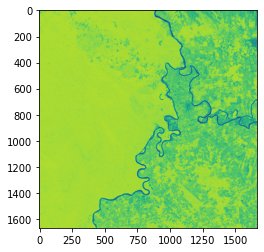

In [9]:
for tile in lista_iter_sorted:
    print(tile[0])
    tup = tile[1].sources.values.item()
    if(len(tup)!= 1):
        print([k.local_uri for k in tup])
    else:
        print(tup[0].local_uri)
    ds = GridWorkflow.load(tile[1], 
                           measurements = ['ndvi_mean'])#,
                           #skip_broken_datasets=True)
    plt.imshow(ds.ndvi_mean[0,:,:])
    plt.show()

# Segmentation

In [1]:
import sys

In [2]:
sys.__stdout__ = sys.stdout 

In [3]:
import os
os.environ.setdefault("DJANGO_ALLOW_ASYNC_UNSAFE", "true")


'true'

In [4]:
import json
import matplotlib.pyplot as plt

from django.contrib.gis.geos.geometry import GEOSGeometry
import geopandas as gpd
from datacube.api import GridWorkflow

from madmex.wrappers import gwf_query
from madmex.models import PredictObject

In [5]:
sys.stdout = sys.__stdout__

In [6]:
region = 'Chiapas'
name_of_product = 'recipe_chiapas_L8_17'
begin = '2017-01-01'
end = '2017-12-31'
gwf_kwargs = {'region': region, 'product': name_of_product, 'begin': begin, 'end':end}
iterable = gwf_query(**gwf_kwargs)

In [7]:
lista_iter = list(iterable)

In [8]:
lista_iter_sorted = sorted(lista_iter, key = lambda x: (x[0][0], x[0][1]))

(52, -40)


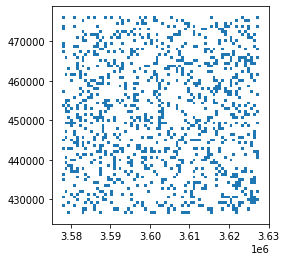

(52, -39)


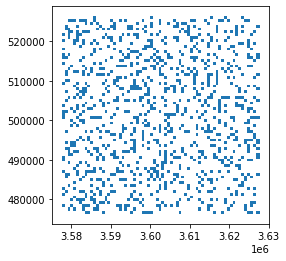

(52, -38)


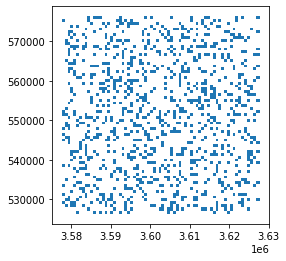

(52, -37)


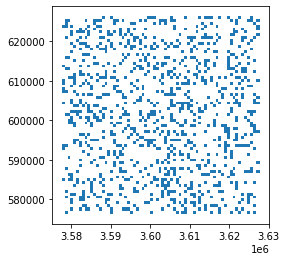

(53, -39)


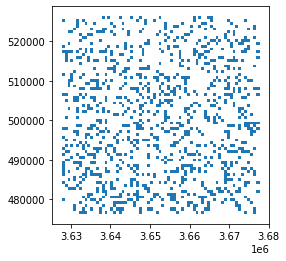

(53, -38)


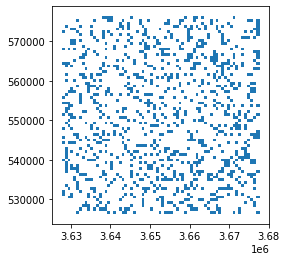

(53, -37)


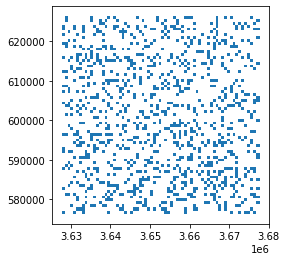

(54, -39)


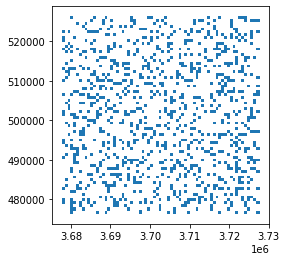

(54, -38)


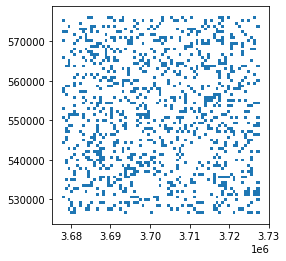

(54, -37)


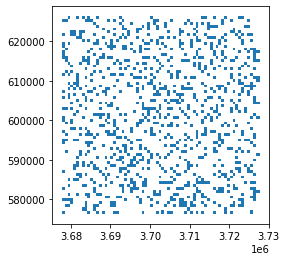

(55, -39)


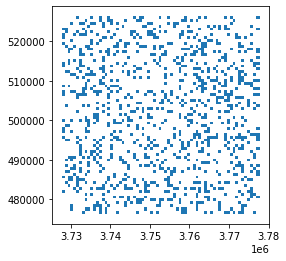

(55, -38)


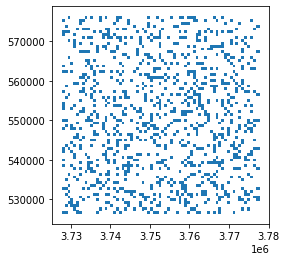

In [9]:
for tile in lista_iter_sorted:
    print(tile[0])
    sr_0 = GridWorkflow.load(tile[1],dask_chunks={'x': 1600, 'y': 1600})
    #read segmentation
    geom = GEOSGeometry(json.dumps(sr_0.geobox.geographic_extent.json))
    seg_name = 'seg_chiapas_L8_17'
    qs = PredictObject.objects.filter(the_geom__contained=geom,segmentation_information__name=seg_name)
    path_seg = qs[0].path
    gdf = gpd.read_file(path_seg)
    gdf_sample = gdf.sample(n=1000)
    gdf_sample.plot()
    plt.show()